In [57]:
%load_ext autoreload
%autoreload 2
from dataset import FashionEdgesDataset
from utils import edges2mask, image2edges, vis_batch, collate_fn, tensor2numpy
import torch
from torch.utils.data import DataLoader
import torchvision
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

# debug
from skimage.morphology import dilation, disk, square
from torch.nn.functional import interpolate
from PIL import Image
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from skimage.transform import resize

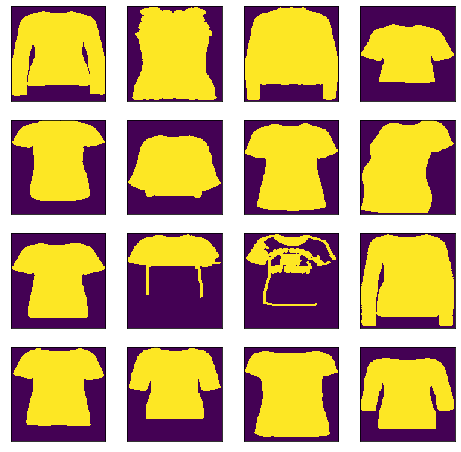

In [63]:
dataset = FashionEdgesDataset('../cp-vton/', check_corrupted=True, size=(128,128), return_mask=True)
training_data_loader = DataLoader(dataset=dataset,
                                  batch_size=36, 
                                  collate_fn = collate_fn,
                                  shuffle=True)

for batch in training_data_loader:
    break
    
vis_batch(batch[-1], 16)

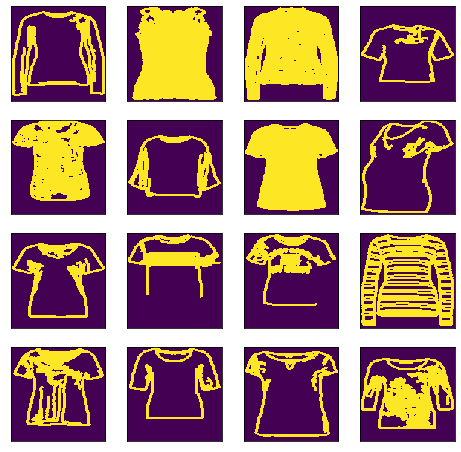

In [64]:
vis_batch(batch[0], 16)

In [29]:
vgg = torchvision.models.vgg19(pretrained=True).cuda()

In [30]:
features = []
for batch in tqdm_notebook(training_data_loader):
    mask = batch[0]
    mask = torch.cat([mask,mask,mask], 1)
    image = batch[1]
    image_bin = image * mask
    
    feature = vgg.features(image_bin.float().cuda())
    
    features.append(feature.detach().cpu())    

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [59]:
(dbscan.labels_ == -1).sum() / len(dbscan.labels_)

0.8252584206455242

In [48]:
dbscan = DBSCAN(leaf_size=100)
dbscan.fit(f)
np.unique(dbscan.labels_)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=100, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)